In [68]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [69]:
def mySoftmax(z):
    return np.exp(z) / np.sum(np.exp(z))

z = np.array([1., 2., 3., 4.])
a = mySoftmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


In [70]:
# Load the data
xTrain = np.load("./datas/X.npy")
yTrain = np.load("./datas/y.npy")

print(f"Size of the trainset: {xTrain.shape}")

Size of the trainset: (5000, 400)


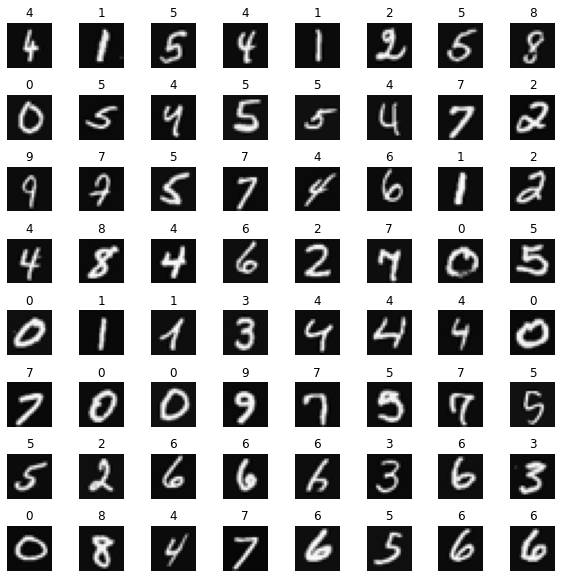

In [71]:
# Show the data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m = xTrain.shape[0]

fig, ax = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=.1)

for i, ax in enumerate(ax.flatten()):
    rnd = np.random.randint(m)
    xRnd = np.transpose(xTrain[rnd].reshape((20,20)))
    
    ax.imshow(xRnd, cmap="gray")
    ax.set_title(yTrain[rnd,0])
    ax.set_axis_off()

In [72]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(400,)),
        tf.keras.layers.Dense(units=25, activation="relu", name = "L1"),
        tf.keras.layers.Dense(units=15, activation="relu", name = "L2"),
        tf.keras.layers.Dense(units=10, activation="linear", name = "L3"), 
    ]
)

model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
)

hist = model.fit(xTrain,yTrain, epochs=80)

Epoch 1/80
157/157 [==============================] - 1s 883us/step - loss: 1.5439
Epoch 2/80
157/157 [==============================] - 0s 861us/step - loss: 0.5943
Epoch 3/80
157/157 [==============================] - 0s 856us/step - loss: 0.3980
Epoch 4/80
157/157 [==============================] - 0s 848us/step - loss: 0.3204
Epoch 5/80
157/157 [==============================] - 0s 853us/step - loss: 0.2812
Epoch 6/80
157/157 [==============================] - 0s 845us/step - loss: 0.2502
Epoch 7/80
157/157 [==============================] - 0s 866us/step - loss: 0.2260
Epoch 8/80
157/157 [==============================] - 0s 870us/step - loss: 0.2069
Epoch 9/80
157/157 [==============================] - 0s 862us/step - loss: 0.1927
Epoch 10/80
157/157 [==============================] - 0s 843us/step - loss: 0.1765
Epoch 11/80
157/157 [==============================] - 0s 843us/step - loss: 0.1648
Epoch 12/80
157/157 [==============================] - 0s 861us/step - loss: 0.1531
E

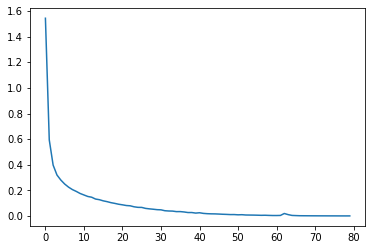

In [73]:
plt.plot(hist.history["loss"])
plt.show()

1/1 [==============================] - 0s 38ms/step
2


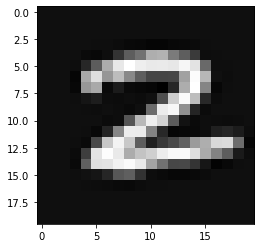

In [74]:
predict_image = xTrain[1011].reshape((1,400))

# Show the image
plt.imshow(np.transpose(predict_image.reshape((20,20))), cmap="gray")

pred = model.predict(predict_image)
print(np.argmax(tf.nn.softmax(pred)))
